In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

from collections import OrderedDict
from adjustText import adjust_text



In [3]:
plt.tight_layout()
def plot_line(obj_dict, 
              fname='', 
              ylabel = 'BLEU', 
              xticks = '', 
              yticks='', 
              xtick_labels='',
              loc="upper left", 
              ylimit=[], 
              xlimit=[], 
              xlog_scale=False,
              even_space=False,
              legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    color_list=["red", "blue"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
#     axes.set_ylim(-1, 13)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
        
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    labelsize=30
    
    axes.tick_params(labelsize=labelsize)
    
#     vaalign=["bottom", "top"]
    vaalign=["top", "bottom"]
    haalign=["left", "left"]

    for i, key in enumerate(obj_dict):
        name = key
#         print(obj_dict)
#         print(key)
#         print(obj_dict[key])
        print(xticks[:len(obj_dict[key])])
        xs = xticks[:len(obj_dict[key])] if not even_space else range(len(obj_dict[key]))
        axes.plot(xs, 
                  obj_dict[key], 
                  label=name, **line_opt,
                  marker=marker_list[i],
                  color=color_list[i]) 
        texts = [axes.text(x, y, '%s' % y, ha=haalign[i], va=vaalign[i], fontsize=labelsize) \
                 for id_, (x,y) in enumerate(zip(xs, obj_dict[key])) if id_ % 2 == 0]
        adjust_text(texts)
#     axes.legend(loc='upper right', prop={'size': 20})
    axes.legend(prop={'size': labelsize}, loc=loc)
#     axes.set_xlabel('epoch', fontsize=25)
    axes.set_ylabel(ylabel, fontsize=labelsize)
#     axes.set_xticks(range(len(obj_dict[key])))
    axes.set_xticks(xs)
    axes.grid(True)
    
    if xlog_scale:
        axes.set_xscale('log')
        
    if ylimit != []:
        axes.set_ylim(ylimit[0], ylimit[1])
        
    if xlimit != []:
        axes.set_xlim(xlimit[0], xlimit[1])
    
    if yticks != '':
        axes.set_yticks(yticks)
    
    if xtick_labels != '':
        axes.set_xticklabels(xtick_labels)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [4]:
def read_csv(fname, label):
    rows = []
    with open(fname, newline="") as fin:
        csvreader = csv.reader(fin, delimiter=',')
        for row in csvreader:
            rows.append(row)
    ticks = [int(x[0]) for x in rows]
    
    res = OrderedDict([])
    for i, name in enumerate(label):
        res[name] = [round(float(x[i+1]), 1) for x in rows if x[i+1] != "" ]
    return res, ticks

In [5]:
prompt_data,  xticks= read_csv("data/num_prompt_new.csv", ["COPA", "ANLI R2"])
print(prompt_data)
print(xticks)

OrderedDict([('COPA', [78.0, 81.0, 82.0, 83.0, 85.0, 83.0]), ('ANLI R2', [33.7, 33.6, 33.9, 38.9, 37.0, 39.8, 38.5, 38.7, 37.7])])
[0, 1, 2, 4, 6, 8, 10, 12, 15]


In [21]:
rte_data = {'RTE': prompt_data['RTE']}

In [79]:
plot_line(rte_data, xlabel=xticks[:len(rte_data['RTE'])], ylimit=[60,80], xlimit=[0,6.6], ylabel="Accuracy", fname="analysis-prompt.pdf")

TypeError: plot_line() got an unexpected keyword argument 'xlabel'

[0, 1, 2, 4, 6, 8]
[0, 1, 2, 4, 6, 8, 10]


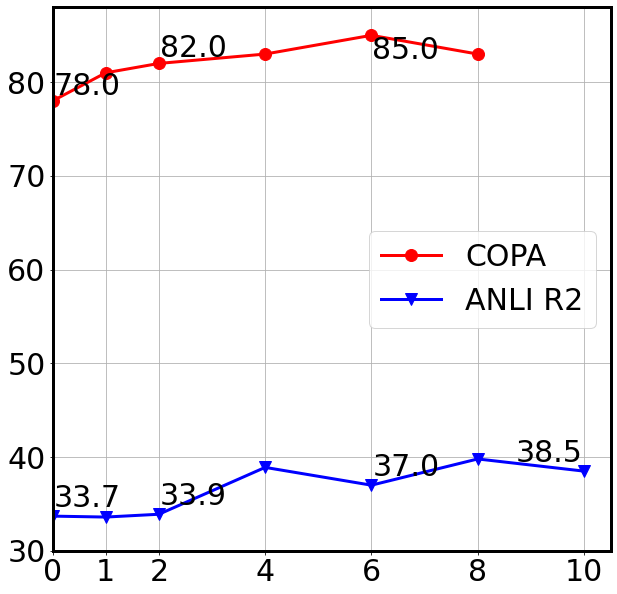

In [10]:
prompt_data['ANLI R2'] = prompt_data['ANLI R2'][:7]
plot_line(prompt_data, xticks=xticks, ylimit=[30,88], xlimit=[0,10.5], loc="best", ylabel="", fname="analysis-prompt.pdf")

In [7]:
num_data,  xticks= read_csv("data/num_examples.csv", ["WIC", "ANLI R2"])
print(num_data)
print(xticks)

OrderedDict([('WIC', [50.3, 54.9, 55.6, 55.8, 54.9, 55.6, 54.5, 55.2]), ('ANLI R2', [33.7, 37.3, 37.6, 39.3, 37.4, 37.5, 37.7, 37.5])])
[0, 10, 30, 50, 70, 100, 300, 500]


In [8]:
plot_line(num_data, xticks=xticks, ylimit=[30,60], 
          xlimit=[0,7.5], loc="best", ylabel="", 
          xlog_scale=False,
          even_space=True,
          xtick_labels=xticks,
          fname="analysis-example.pdf")

[0, 10, 30, 50, 70, 100, 300, 500]
[0, 10, 30, 50, 70, 100, 300, 500]
